# The Sparks Foundation: Data Science and Business Analytics Internship

# Name : Priyanka Shaw

# Task#2 : Prediction using Unsupervised Machine Learning- Iris Dataset
**Problem statement : From the given "iris" dataset. Predict the optimum number of clusters and represent it visually**

#  

# STEP(1) : Importing the required libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from pylab import rcParams

# STEP(2) : Importing the dataset
**Reading in the data from the source.**

In [8]:
iris = pd.read_csv('Iris.csv')
iris.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# STEP(3) : Finding some properties of the data

In [9]:
iris.shape

(150, 6)

In [10]:
#checking for the null values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
#now we will drop the label column because it is an unsupervised leaning problem 
iris_data= pd.DataFrame(iris)
iris_df = iris_data.drop(columns = ['Species','Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Finding the optimum number of clusters
Before clustering the data using KMeans, we need to specify the number of clusters . In order to find the optimum number of clusters , there are various methods available like SILHOUETTE COEFFICIENT and the THE ELBOW METHOD . Here , the Elbow method is used.  

## Finding the optimum number of cluster using The Elbow method

In [15]:
#creating several cluster combination and observe the wcss ( within cluster sum of squares)
wcss= []

cluster_range =range(1,15)
for i in cluster_range:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)
    

F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\PRIYANKA SHAW\AppData\Local\Temp\ipykernel_6668\2020462161.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(cluster_range, wcss, 'go--', color= 'green' )


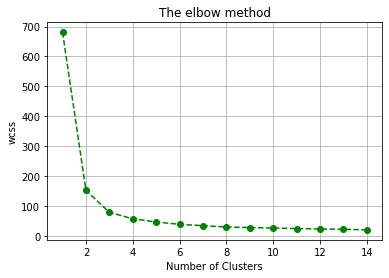

In [16]:
#plotting the wcss against cluster range

plt.plot(cluster_range, wcss, 'go--', color= 'green' )
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

#### we can claerly see why it is called " The Elbow Method " from the above graph , the optimum clusters is where the elbow occurs. This is when the within cluster sum of square(wcss) doesnot significantly with every iteration.
#### From this we can choose the number of clusters as "3"

# STEP(5) : Applyting k means clustering on the data


In [22]:
from sklearn.cluster import KMeans 

model = KMeans(n_clusters = 3, init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state =0)
predictions = model.fit_predict(iris_df)

# STEP(6) : Visualising the cluster

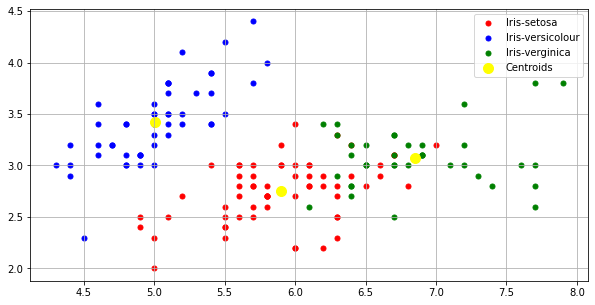

In [30]:
#data arrangement
plt.figure(figsize=(10,5))
x = iris_df.iloc[:, [0,1,2,3]].values
plt.scatter(x[predictions == 0,0], x[predictions == 0 , 1], s = 25, c = "red" , label = 'Iris-setosa')
plt.scatter(x[predictions == 1,0], x[predictions == 1 , 1], s = 25, c = "blue" , label = 'Iris-versicolour')
plt.scatter(x[predictions == 2,0], x[predictions == 2 , 1], s = 25, c = "green" , label = 'Iris-verginica')

#plotting the cluster centers
plt.scatter(model.cluster_centers_[:, 0] , model.cluster_centers_[:,1], s= 100, c='yellow' , label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

# Thank You!!!!